In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
from tensorflow.python.keras.utils import np_utils

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

from time import time
from tensorflow.python.keras.callbacks import TensorBoard

In [17]:
n = 100
data = []
for i in range(1200):
    img = image.load_img("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\output\\cat\\cat_v_" + str(i) + ".jpg",target_size=(n,n), color_mode='rgb')
    arr = image.img_to_array(img)
    arr= arr.astype('float32') / 255.
    data.append([arr, [1,0]])
    
for i in range(1300):
    img = image.load_img("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\output\\dog\\dog_v_" + str(i) + ".jpg",target_size=(n,n), color_mode='rgb')
    arr = image.img_to_array(img)
    arr= arr.astype('float32') / 255.
    data.append([arr, [0,1]])
    
trean_x = [x[0] for x in data]
trean_y = [y[1] for y in data]

data.clear()

tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))

In [18]:
model = Sequential()

model.add(Convolution2D(100,3,1,padding='same', input_shape=(100,100, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

model.add(Convolution2D(200,3,1,padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

model.add(Convolution2D(400,3,1,padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 100)     2800      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 100)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 200)       180200    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 200)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 400)       720400    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 400)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 67600)             0         
__________

In [19]:
trean_x = np.array(trean_x)
trean_y = np.array(trean_y)
trean_y.reshape(2500, 2)
model.fit(trean_x, trean_y, batch_size=32, epochs=7, validation_split=0.1 ,shuffle=True, callbacks = [tensorboard])

Train on 2250 samples, validate on 250 samples
Epoch 1/7
2250/2250 [==============================] - 226s 101ms/step - loss: 0.7237 - acc: 0.5769 - val_loss: 0.6941 - val_acc: 0.4520
Epoch 2/7
2250/2250 [==============================] - 224s 100ms/step - loss: 0.5516 - acc: 0.7027 - val_loss: 0.6785 - val_acc: 0.5560
Epoch 3/7
2250/2250 [==============================] - 224s 99ms/step - loss: 0.4589 - acc: 0.7751 - val_loss: 0.3772 - val_acc: 0.8120
Epoch 4/7
2250/2250 [==============================] - 223s 99ms/step - loss: 0.3596 - acc: 0.8404 - val_loss: 0.2646 - val_acc: 0.9000
Epoch 5/7
2250/2250 [==============================] - 224s 99ms/step - loss: 0.2725 - acc: 0.8764 - val_loss: 0.7872 - val_acc: 0.6880
Epoch 6/7
2250/2250 [==============================] - 225s 100ms/step - loss: 0.1805 - acc: 0.9253 - val_loss: 0.7252 - val_acc: 0.7680
Epoch 7/7
2250/2250 [==============================] - 225s 100ms/step - loss: 0.1181 - acc: 0.9529 - val_loss: 0.5600 - val_acc: 0.82

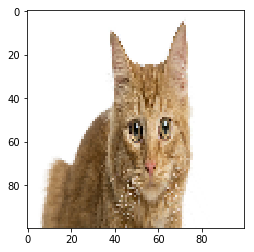

[[9.9980873e-01 1.9124577e-04]]


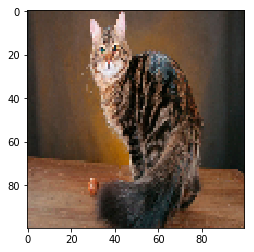

[[0.99797755 0.00202245]]


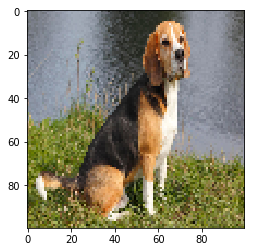

[[2.4682589e-07 9.9999976e-01]]


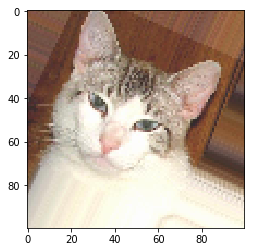

[[9.9980563e-01 1.9434023e-04]]


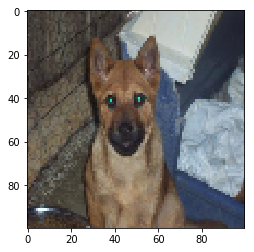

[[0.47854152 0.5214585 ]]


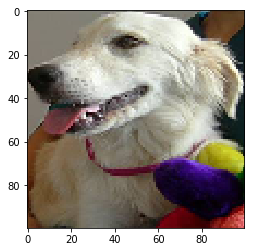

[[0.28744534 0.71255463]]


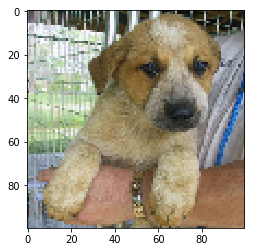

[[7.1744478e-05 9.9992824e-01]]


In [20]:
def FilePredict(path, m):
    img = image.load_img(path,target_size=(100,100), color_mode='rgb')
    arr = image.img_to_array(img)
    arr= arr.astype('float32') / 255.
    
    plt.imshow(arr,cmap='brg')
    plt.show()
    
    arr = arr.reshape(1,100,100,3)
    
    classes = m.predict(arr)
    
    print(classes)
    
FilePredict("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\test\\Cat\\metka.jpg", model)
FilePredict("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\test\\Cat\\tild3436-3533-4562-a138-303536626563__eo3qwhiwjbc.jpg", model)
FilePredict("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\test\\Dog\\tild3037-3231-4134-a333-303139306331__-5.jpg", model)
FilePredict("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\output\\cat\\cat_v_11.jpg", model)
FilePredict("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\test\\Dog\\32.jpg", model)
FilePredict("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\test\\Dog\\7876.jpg", model)
FilePredict("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\test\\Dog\\7880.jpg", model)



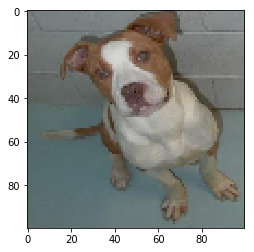

[[0.7333335  0.26666653]]


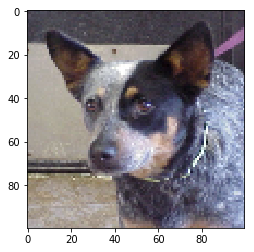

[[4.7600197e-04 9.9952400e-01]]


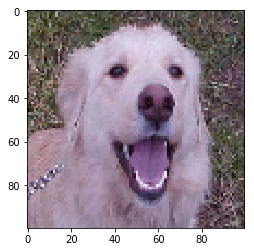

[[1.0892537e-06 9.9999893e-01]]


In [21]:
FilePredict("C:\\Users\\PM65M\\OneDrive\\Desktop\\PetImages\\Dog\\7891.jpg", model)
FilePredict("C:\\Users\\PM65M\\OneDrive\\Desktop\\PetImages\\Dog\\7921.jpg", model)
FilePredict("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\test\\Dog\\7928.jpg", model)


In [22]:
data.clear()

import os
for path in os.listdir("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\test\\Cat"):
    img = image.load_img("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\test\\Cat\\"+ path, target_size=(n,n), color_mode='rgb')
    arr = image.img_to_array(img)
    arr= arr.astype('float32') / 255.
    data.append([arr, [1,0]])
                         
for path in os.listdir("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\test\\Dog"):
    img = image.load_img("C:\\Users\\PM65M\\OneDrive\\Desktop\\data\\test\\Dog\\"+ path,target_size=(n,n), color_mode='rgb')
    arr = image.img_to_array(img)
    arr= arr.astype('float32') / 255.
    data.append([arr, [0,1]])
                                                  
test_x = [x[0] for x in data]
test_y = [y[1] for y in data]

test_x = np.array(test_x)
test_y = np.array(test_y)
test_y.reshape(70, 2)

score = model.evaluate(test_x, test_y, batch_size=32)
print(score)

70/70 [==============================] - 2s 26ms/step
[0.831617003253528, 0.842857141154153]
